# Hello Bank Customer Churn Prediction Binary Classifier

In [2]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Load Data

In [3]:
data_path = "data/Churn_Modelling.csv"

df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check possible values in Geogrpahy and Gender

In [5]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Remove RowNumber, CustomerId and Surname columns from features.  Exited is the target/dependent variable.

In [10]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (10000, 10), y shape: (10000,)


### Feature Engineering

Label Encode Gender field

In [11]:
from sklearn.preprocessing import LabelEncoder

print(f" Before: {X[:,2]}")
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(f"After: {X[:, 2]}")

 Before: ['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']
After: [0 0 0 ... 0 1 0]


One-Hot Encode Geography

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

### Split Dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")

X_train shape: (6000, 12), X_val shape: (2000, 12), X_test shape: (2000, 12)


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")

X_train shape: (6000, 12), X_val shape: (2000, 12), X_test shape: (2000, 12)


### Build ANN (Artificial Neural Network)

In [35]:
ann_clf = tf.keras.models.Sequential()
ann_clf.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile the ANN

In [16]:
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the ANN

In [61]:
history = ann_clf.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7454 - loss: 0.5816 - val_accuracy: 0.7950 - val_loss: 0.4798
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4802 - val_accuracy: 0.7950 - val_loss: 0.4550
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4547 - val_accuracy: 0.7960 - val_loss: 0.4360
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4399 - val_accuracy: 0.8135 - val_loss: 0.4242
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4229 - val_accuracy: 0.8240 - val_loss: 0.4159
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4201 - val_accuracy: 0.8240 - val_loss: 0.4086
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8162 - loss: 0.4065 - val_accuracy: 0.8225 - val_loss: 0.4022
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.3971 - val_accu

### Evaluate Model

In [62]:
test_loss, test_accuracy = ann_clf.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8537 - loss: 0.3546  
Test Loss: 0.3533022403717041, Test Accuracy: 0.8575000166893005


In [67]:
# Combine results into a DataFrame for better visualization
df_results = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Loss': [history.history['loss'][-1], history.history['val_loss'][-1], test_loss],
    'Accuracy': [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_accuracy]
})

print(df_results.to_string(index=False))

   Dataset     Loss  Accuracy
     Train 0.336897  0.864667
Validation 0.334054  0.860500
      Test 0.353302  0.857500


Plot Train and Validation Loss over Epochs

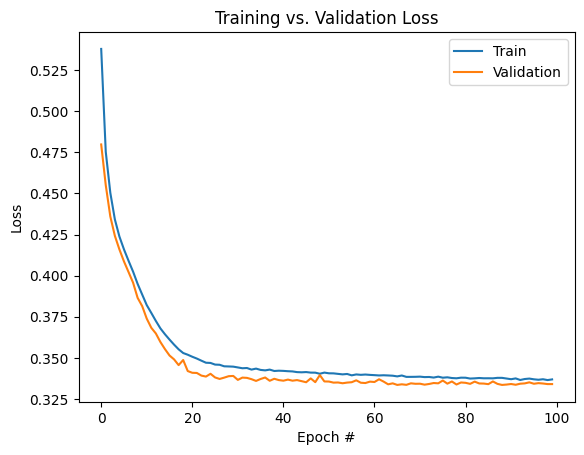

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Repeat with Early Stopping

Build ANN

In [ ]:
ann_clf = tf.keras.models.Sequential()
ann_clf.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile ANN

In [36]:
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Define early stopping callback

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    restore_best_weights=True)

Train the ANN

In [38]:
history = ann_clf.fit(X_train, y_train, 
                      batch_size=32, 
                      epochs=100, 
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])

Epoch 1/100


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3286 - loss: 0.8947 - val_accuracy: 0.7725 - val_loss: 0.5946
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.5640 - val_accuracy: 0.8025 - val_loss: 0.5059
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4909 - val_accuracy: 0.8080 - val_loss: 0.4638
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4561 - val_accuracy: 0.8165 - val_loss: 0.4392
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4312 - val_accuracy: 0.8215 - val_loss: 0.4238
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8134 - loss: 0.4257 - val_accuracy: 0.8265 - val_loss: 0.4117
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4105 - val_accuracy: 0.8330 - val_loss: 0.4018
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.3912 - val_accuracy: 0.8390

In [39]:
# Check if early stopping happened
if early_stopping.stopped_epoch > 0:
    best_epoch = early_stopping.stopped_epoch - early_stopping.patience
else:
    best_epoch = len(history.history['loss']) - 1  # Use the last epoch as the best one

print(f"Stooped Epoch: {best_epoch + 1}")

Stooped Epoch: 38


Evaluate Model

In [41]:
test_loss, test_accuracy = ann_clf.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.3550  
Test Loss: 0.3558, Test Accuracy: 0.8545


In [42]:
# Combine results into a DataFrame for better visualization
df_results = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Loss': [history.history['loss'][best_epoch], history.history['val_loss'][best_epoch], test_loss],
    'Accuracy': [history.history['accuracy'][best_epoch], history.history['val_accuracy'][best_epoch], test_accuracy]
})

print(df_results.to_string(index=False))

   Dataset     Loss  Accuracy
     Train 0.344164  0.860833
Validation 0.334601  0.859500
      Test 0.355770  0.854500


Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

y_pred = ann_clf.predict(X_test)    # Get the predicted values
y_pred_labeled = (y_pred > 0.5)             # Convert the probabilities into binary

cm = confusion_matrix(y_test, y_pred_labeled)

print(cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
[[1514   68]
 [ 223  195]]


Print Weights and Biases

In [47]:
for layer in ann_clf.layers:
    print(f"Layer name: {layer.name}")
    print(f"Layer config:\n{layer.get_config()}")
    weights, biases = layer.get_weights()
    print(f"Layer weights:\n{weights}")
    print(f"Layer biases:\n{biases}")

Layer name: dense_3
Layer config:
{'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 6, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Layer weights:
[[ 0.18494278 -0.24325739  0.30883315 -0.17568211  0.34108222  0.09025869]
 [-0.05271257  0.10762063  0.1445732  -0.07403272 -0.16697943 -0.15992305]
 [ 0.16032611 -0.26605248  0.28034508 -0.1966228   0.01840341  0.07403968]
 [-0.00332701 -0.04345971 -0.38121387 -0.00870114 -0.14973809 -0.06464195]
 [ 0.26039684  0.13318361 -0.0888845   0.18714133  0.4916392   0.3032425 ]
 [ 0.66725

### Save Model

In [49]:
ann_clf.save("bank_churn_protection.keras")

## Compare model performance with and without scaling

Split the data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (8000, 12), X_test shape: (2000, 12)


Build and train with and without feature scaling

In [51]:
import time

# Function to build and train the ANN model
def build_and_train_ANN(X_train, X_test, y_train, y_test, scale_data=False):
    if scale_data:
        # Feature Scaling
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        print("Training with Feature scaling")
    else:
        # When no scaling, just convert to float explicitly
        X_train = X_train.astype(np.float32)
        X_test = X_test.astype(np.float32)
        print("Training without feature scaling")

    # Build the ANN
    ann_clf = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=6, activation='relu'),
        tf.keras.layers.Dense(units=6, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile
    ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    time_start = time.time()
    history = ann_clf.fit(X_train, y_train, batch_size=32, epochs=30, verbose=0)
    time_end = time.time()

    # Evaluate model 
    test_loss, test_accy = ann_clf.evaluate(X_test, y_test, verbose=0)

    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accy}")
    print(f"Training time: {time_end - time_start:.3f} seconds")

    return history.history['accuracy']


In [52]:
# Train without scaled features
hist_no_scaling = build_and_train_ANN(X_train, X_test, y_train, y_test, scale_data=False)

# Train with scaled features
hist_with_scaling = build_and_train_ANN(X_train, X_test, y_train, y_test, scale_data=True)

Training without feature scaling
Test Loss: 55.82926559448242
Test Accuracy: 0.796999990940094
Training time: 6.830 seconds
Training with Feature scaling
Test Loss: 0.3970894515514374
Test Accuracy: 0.8379999995231628
Training time: 6.840 seconds


Visualize Accuracy

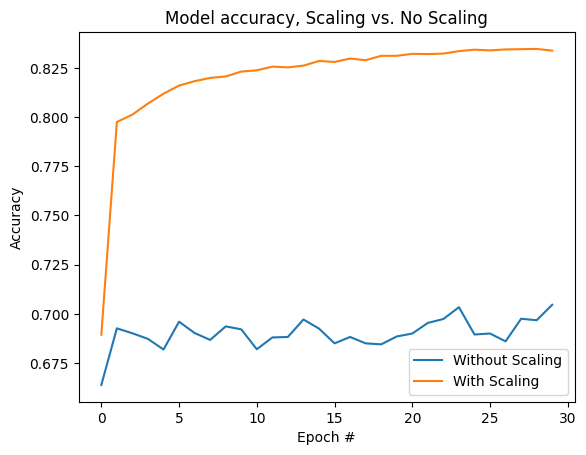

In [53]:

plt.plot(hist_no_scaling, label='Without Scaling')
plt.plot(hist_with_scaling, label='With Scaling')
plt.title('Model accuracy, Scaling vs. No Scaling')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.legend()
plt.show()